# Project 3: Time Series Forecasting with LSTM 
Project Description: This project aims to forecast future temperature values using LSTM neural networks. 

In [26]:
# importing neccessary libaries for the Time Series Forecasting with LONG TERM SHORT TERM MEMORY LSTM Project
!pip install tensorflow
import numpy as np # Numerical computation library for array and matrix operations
import pandas as pd # Data manipulation and analysis library
import matplotlib.pyplot as plt # Visualization library for plotting graphs
from sklearn.preprocessing import MinMaxScaler # For normalizing data between 0 and 1
from sklearn.metrics import mean_squared_error, mean_absolute_error # Evaluation metrics
# Keras modules for building neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [27]:
# Task 1: Analyze and visualize time series data. 
# A. Load n Inspect the Dataset
# i. Display rows
# ii. Check column names
# iii. Check data types

In [28]:
# Loading the climate dataset from CSV file into the working environment
data = pd.read_csv("DailyDelhiClimateTrain.csv")

# Display the entire data to understand the data structure
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [29]:
data.head() # Display the first 5 rows
data.tail() # Display the last 5 rows
data.columns # Get all column names
data.dtypes # Check data types of each column
data.info() # which is a comprehensive summary that includes data types, column names, and missing (null) value counts
data.describe() # Display summary statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [30]:
# Convert Date Column and Set as Index

In [31]:
# Convert the 'date' column to datetime format, to ensure pandas doesnt read it as a string
data["date"] = pd.to_datetime(data["date"])

# Set 'date' as index for time-series processing and to set time as a primary key
data.set_index("date", inplace=True)


In [32]:
# Visualize Temperature Time Series

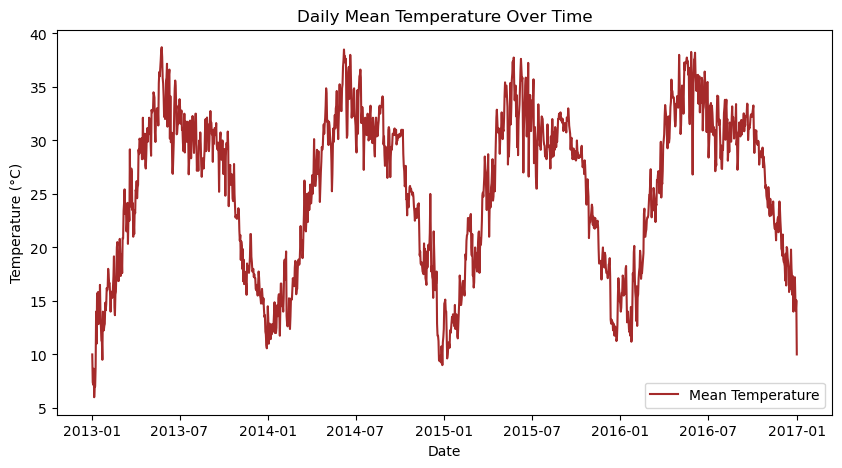

In [33]:
# Create a new figure for plotting our graph i.e 10inches wide, 5inches tall
plt.figure(figsize=(10, 5))

# Plot mean temperature against time (creates a small box on the graph and name it mean tempeature)
plt.plot(data['meantemp'], label='Mean Temperature', color = 'brown')

# Add title and axis labels
plt.title("Daily Mean Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")

# Display legend
plt.legend()

# Show the plot
plt.show()


In [34]:
# Select Target Variable and Normalize Data

In [35]:
# Extract only the temperature column as the target variable
temp_data = data[['meantemp']].values

# Initialize Min-Max scaler to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply normalization to temperature data
temp_scaled = scaler.fit_transform(temp_data)


In [36]:
# B. Prepare sequences for LSTM input. 
# LSTM expects: Input shape → (samples, timesteps, features)

In [37]:
# Function to convert time series into input-output sequences
def create_sequences(data, seq_length):
    X = []  # List to store input sequences
    y = []  # List to store corresponding target values
    
    # Loop through dataset to create sliding windows
    for i in range(len(data) - seq_length):
        
        # Select 'seq_length' consecutive values as input
        X.append(data[i:i + seq_length])
        
        # Select the next value as the prediction target
        y.append(data[i + seq_length])
    
    # Convert lists to NumPy arrays
    return np.array(X), np.array(y)


In [38]:
# Creating the sequence

In [39]:
# Number of previous days used to predict next day
SEQ_LEN = 30  

# Generate input-output pairs
X, y = create_sequences(temp_scaled, SEQ_LEN)


In [40]:
# Split into Training and Testing Sets

In [41]:
# Calculate index to split 80% training and 20% testing reason, to ensure model accuracy
split = int(0.8 * len(X))

# Training data
X_train = X[:split]
y_train = y[:split]

# Testing data
X_test = X[split:]
y_test = y[split:]

In [42]:
# C Design and train an LSTM model (Building the LSTM Model)

In [43]:
# Initialize a sequential neural network model
model = Sequential()

# Add an LSTM layer with 50 memory units
# input_shape = (timesteps, features)
model.add(LSTM(50, return_sequences=False, input_shape=(SEQ_LEN, 1)))

# Add a fully connected output layer with one neuron (temperature prediction)
model.add(Dense(1))

# Compile the model using Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mse')

# Display model architecture
model.summary()

c:\Users\landm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0838 - val_loss: 0.0122
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 9/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 10/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 11/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 12/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0

In [45]:

pred = model.predict(X_test)
pred = scaler.inverse_transform(pred)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)

print("RMSE:", rmse)
print("MAE:", mae)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
RMSE: 1.8544565958734014
MAE: 1.4137056875080416


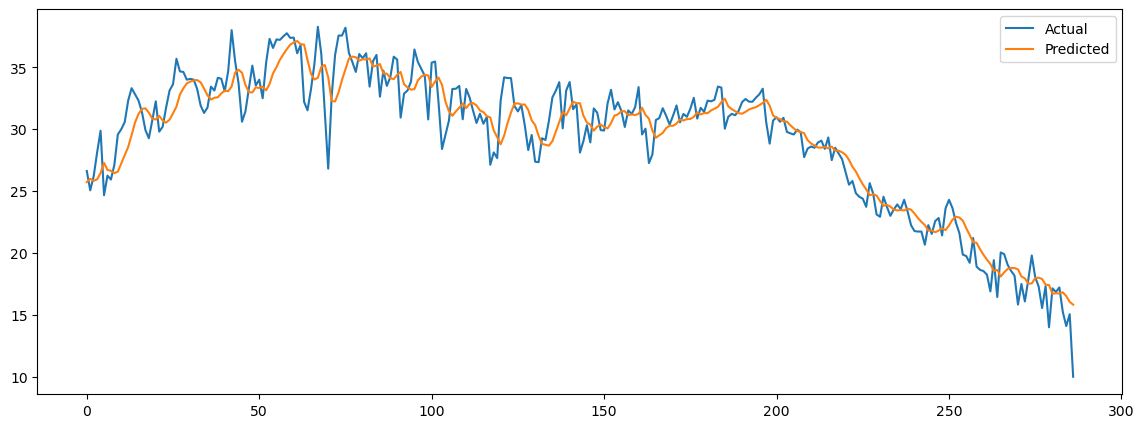

In [46]:

plt.figure(figsize=(14,5))
plt.plot(actual, label="Actual")
plt.plot(pred, label="Predicted")
plt.legend()
plt.show()
